#   **California Housing Predction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('median_house_value',axis=1)
y = df['median_house_value']

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= .2,random_state=42,shuffle=True)

In [9]:
train_df = X_train.join(y_train)

**EDA For Train Data**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

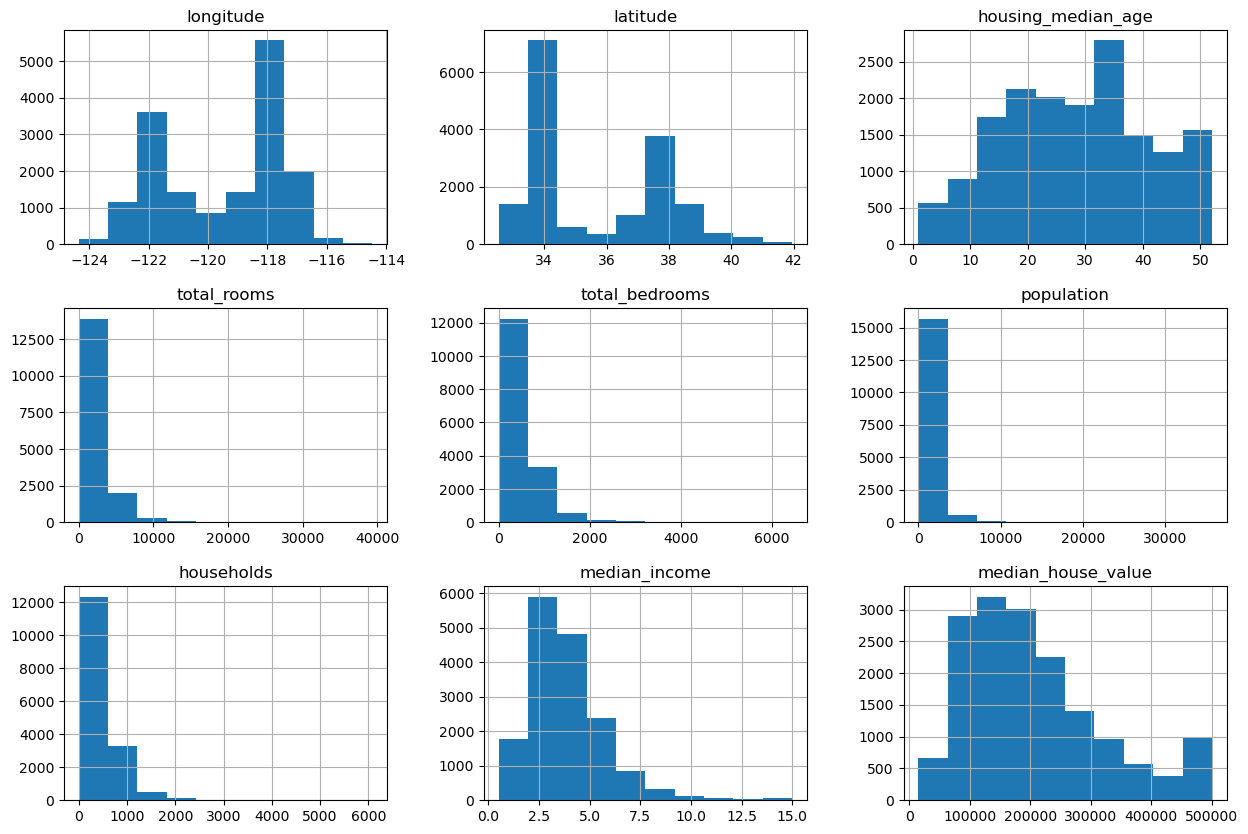

In [10]:
train_df.hist(figsize=(15,10))

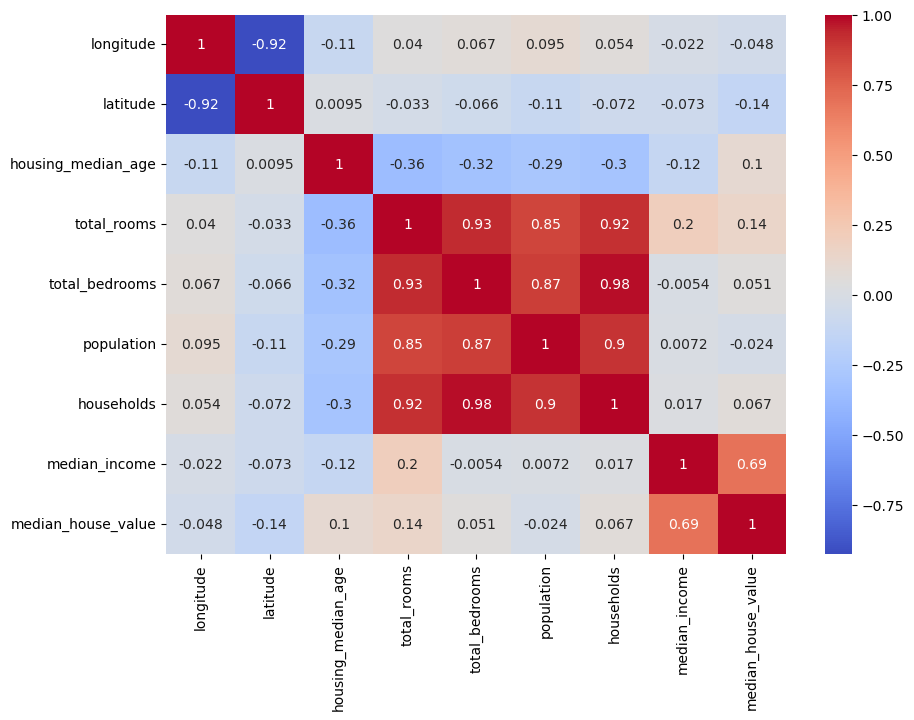

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(train_df.select_dtypes(include=['number']).corr() ,annot=True,cmap='coolwarm')
plt.show()

In [12]:
train_df['total_rooms'] = np.log(train_df['total_rooms']) + 1
train_df['total_bedrooms'] = np.log(train_df['total_bedrooms']) + 1
train_df['population'] = np.log(train_df['population']) + 1
train_df['households'] = np.log(train_df['households']) + 1

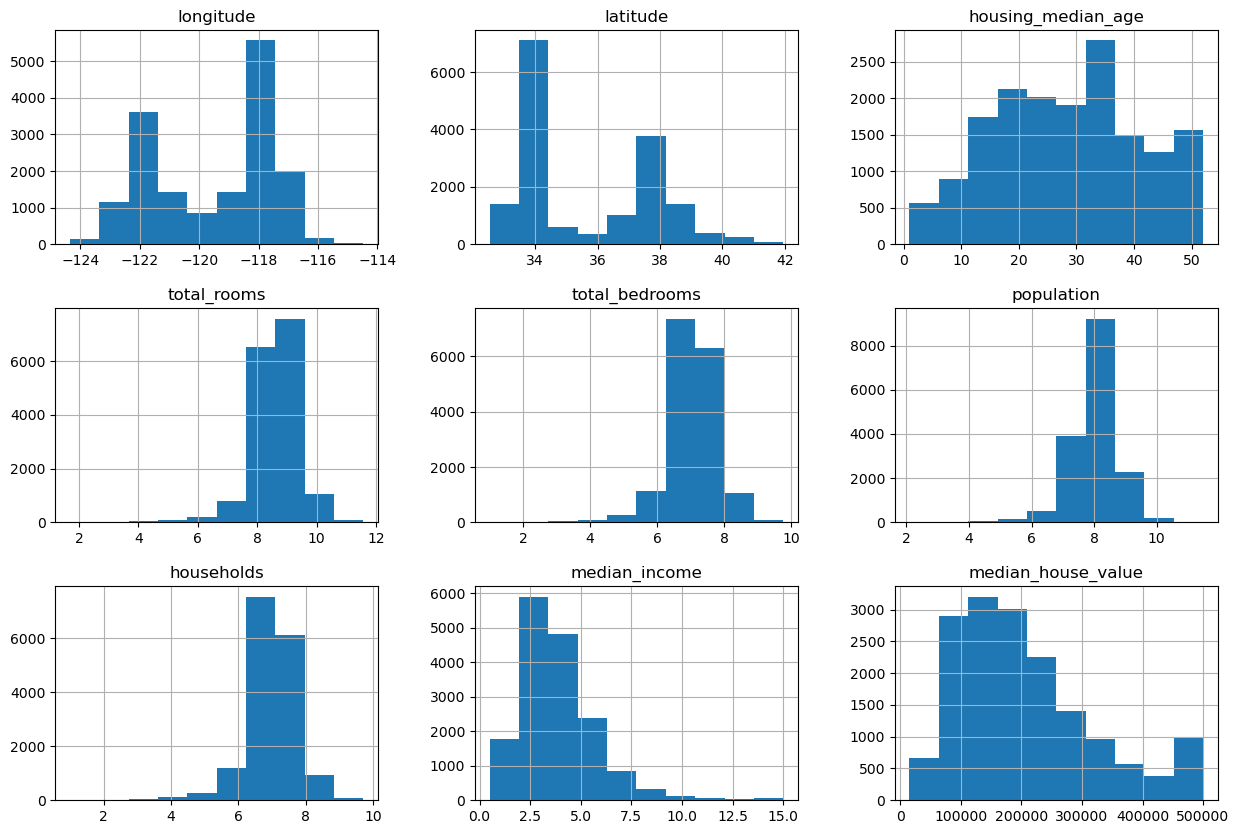

In [13]:
train_df.hist(figsize=(15,10))
plt.show()

In [14]:
train_df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [15]:
train_df = train_df.join(pd.get_dummies(train_df.ocean_proximity))
train_df.drop('ocean_proximity',axis=1,inplace=True)
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,9.392083,7.828712,8.900266,7.792344,4.7027,227600.0,True,False,False,False,False
2057,-119.63,36.64,33.0,7.943122,6.198497,7.429719,6.159055,3.4107,110400.0,False,True,False,False,False
6453,-118.06,34.12,25.0,9.266421,7.742881,8.521859,7.632002,3.6639,248100.0,False,True,False,False,False
4619,-118.31,34.07,28.0,8.767264,7.855409,8.922624,7.795706,2.2364,305600.0,True,False,False,False,False
15266,-117.27,33.04,27.0,8.516977,6.971262,8.171657,7.001415,3.5500,214600.0,False,False,False,False,True


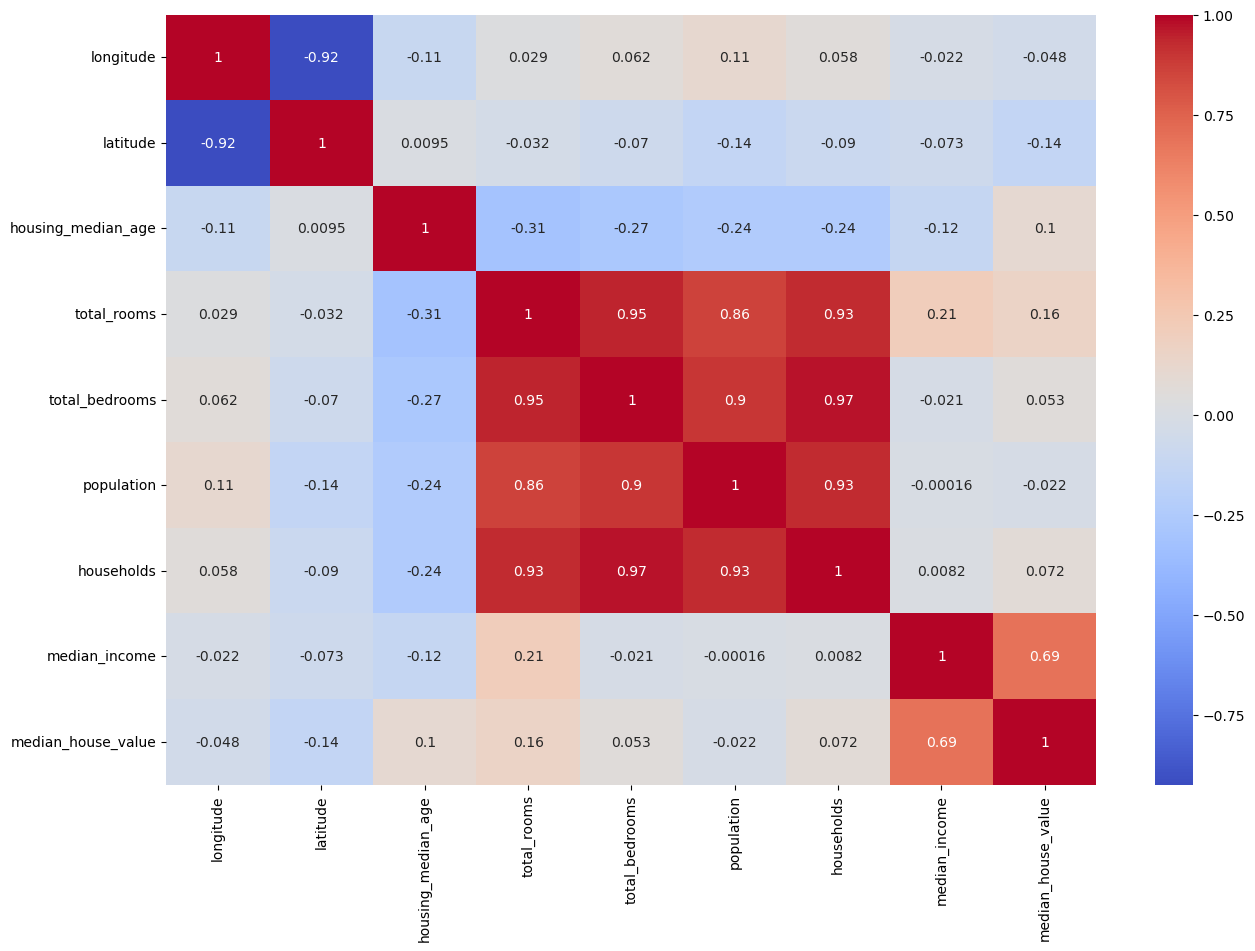

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.select_dtypes(include=['number']).corr() ,annot=True,cmap='coolwarm')
plt.show()

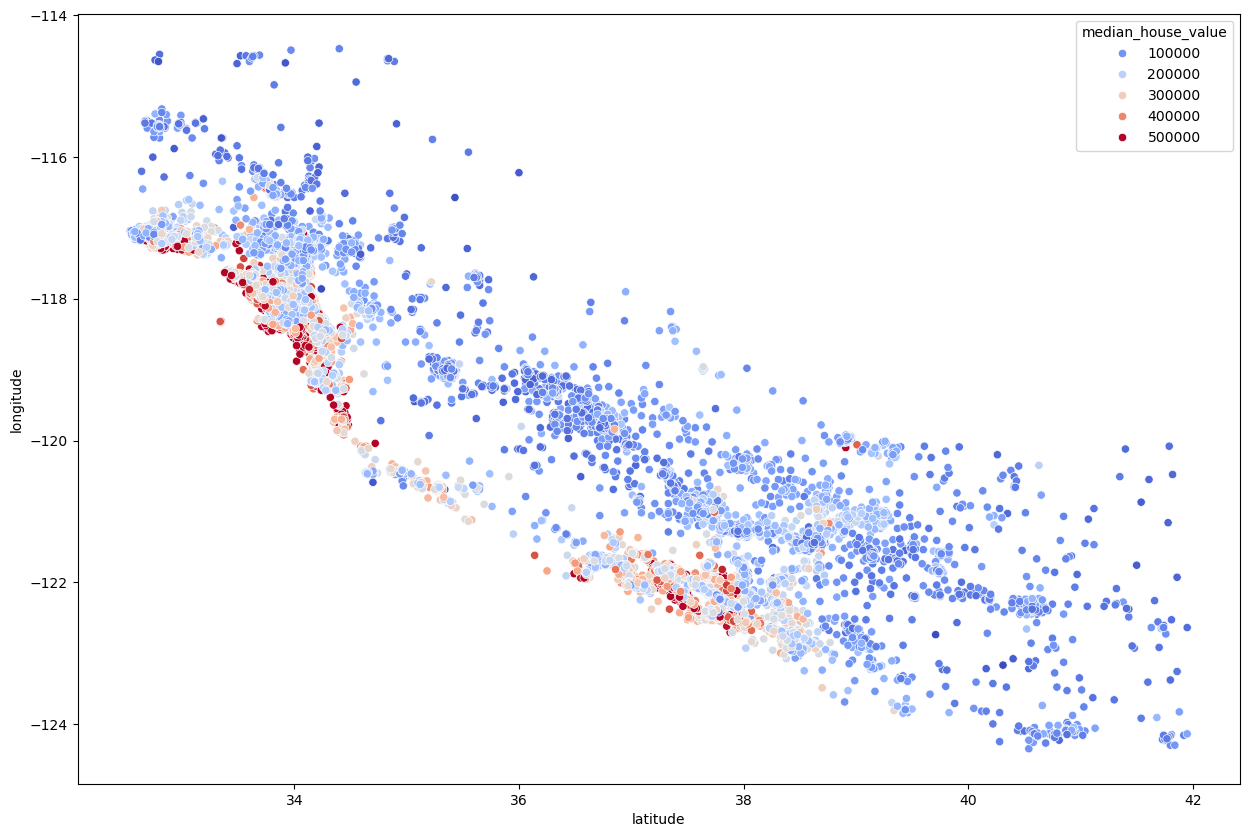

In [17]:
plt.figure(figsize=(15,10))
sns.scatterplot(train_df,y='longitude',x='latitude',hue='median_house_value',palette='coolwarm')
plt.show()

We find that a high price house is the neest to see.

**Futre Engineering**

In [18]:
train_df['badroom_ratio'] = train_df['total_bedrooms'] / train_df['total_rooms']
train_df['household_room'] = train_df['total_rooms'] / train_df['households'] 

<Axes: >

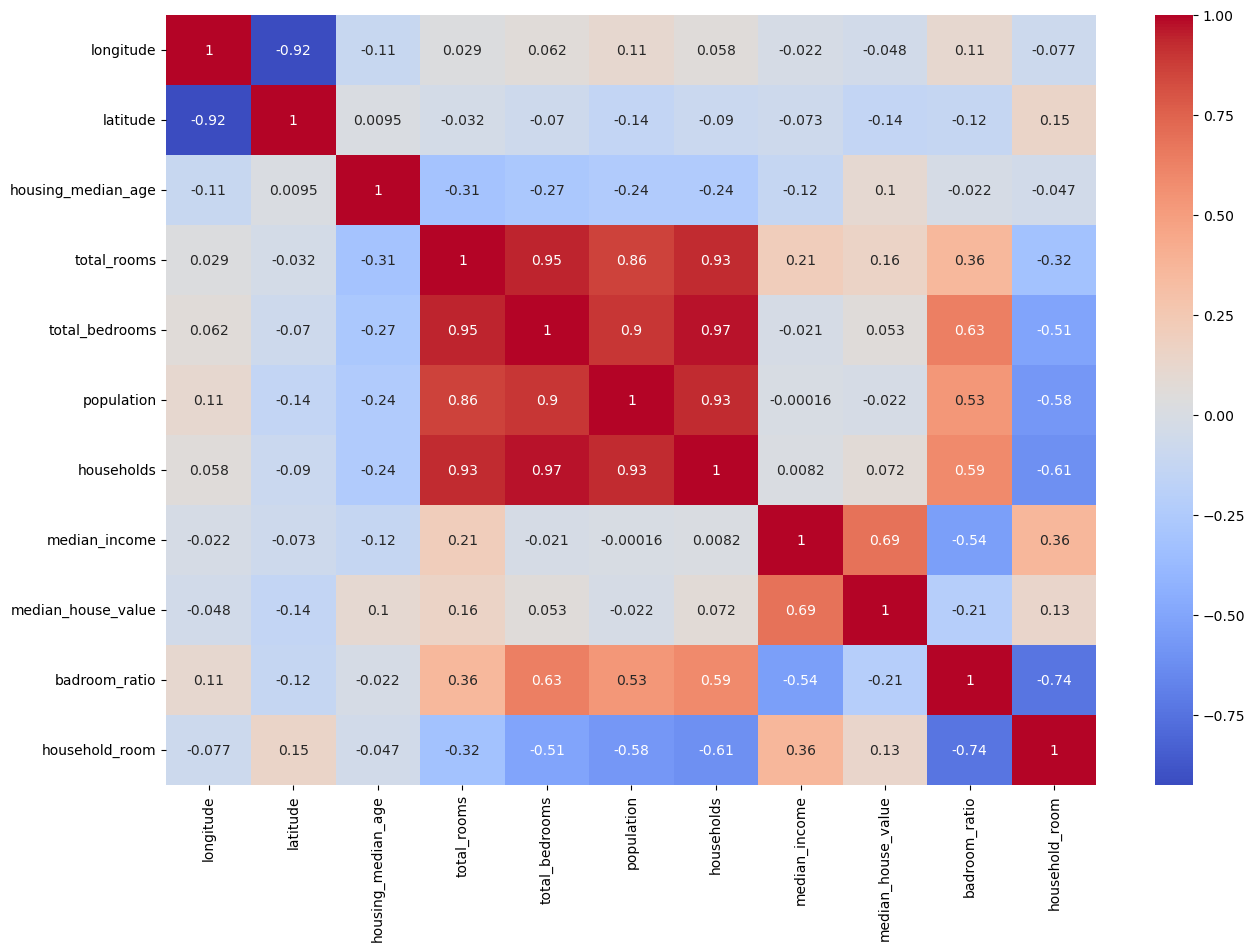

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.select_dtypes(include=['number']).corr() ,annot=True,cmap='coolwarm')
#plt.show()

**Build A Model**

**Start With LinearRegression**

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_df.drop('median_house_value',axis=1), train_df['median_house_value']

X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [21]:
test_df = X_test.join(y_test)

test_df['total_rooms'] = np.log(test_df['total_rooms']) + 1
test_df['total_bedrooms'] = np.log(test_df['total_bedrooms']) + 1
test_df['population'] = np.log(test_df['population']) + 1
test_df['households'] = np.log(test_df['households']) + 1

test_df = test_df.join(pd.get_dummies(test_df.ocean_proximity))
test_df.drop('ocean_proximity',axis=1,inplace=True)

test_df['badroom_ratio'] = test_df['total_bedrooms'] / test_df['total_rooms']
test_df['household_room'] = test_df['total_rooms'] / test_df['households'] 

X_test, y_test = test_df.drop('median_house_value',axis=1), test_df['median_house_value']
X_test_s = scaler.transform(X_test)

In [22]:
reg.score(X_test_s,y_test)

0.6685994598194162

**Try RandomForestRegressor**

In [23]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
forest.score(X_test,y_test)

0.821696608304851

**GridSearch**

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[3,10,30],
    'max_features':[2,4,6,8]
}

grid_search = GridSearchCV(forest,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [26]:
best_forset = grid_search.best_estimator_

In [27]:
best_forset.score(X_test,y_test)

0.8122843277908885

In [28]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lin = LinearRegression()

lin.fit(X_train,y_train)

lin.score(X_test,y_test)

0.668599459819416

In [29]:
l1 = Lasso()

l1.fit(X_train,y_train)

l1.score(X_test,y_test)

e:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.781e+13, tolerance: 2.164e+10
  model = cd_fast.enet_coordinate_descent(


0.6687666565069743

In [30]:
l2 = Ridge()

l2.fit(X_train,y_train)

l2.score(X_test,y_test)

0.6691533152733198

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=.5, random_state=42)

ada_clf.fit(X_train, y_train)

ada_clf.score(X_test,y_test)

e:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.046733545387815024

Best Model is **Random Forest**